In [142]:
# Import libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("./dataset/data.csv")

In [143]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [145]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [146]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [147]:
# Will convert Yes/No in Churn column to binary
df['Churn'] = df['Churn'].map({
'Yes':1, 'No':0
})

In [148]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [149]:
# Convert total charges to number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [150]:
# Check how many total charges are missing
df['TotalCharges'].isna().sum()

11

In [151]:
# Since low number missing I will drop it
df.dropna(subset=['TotalCharges'], inplace=True)

# customerID not useful for prediction so dropped
df = df.drop('customerID', axis=1)




In [152]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [153]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [154]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

In [155]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   SeniorCitizen                          7032 non-null   category
 1   tenure                                 7032 non-null   int64   
 2   MonthlyCharges                         7032 non-null   float64 
 3   TotalCharges                           7032 non-null   float64 
 4   Churn                                  7032 non-null   int64   
 5   gender_Male                            7032 non-null   bool    
 6   Partner_Yes                            7032 non-null   bool    
 7   Dependents_Yes                         7032 non-null   bool    
 8   PhoneService_Yes                       7032 non-null   bool    
 9   MultipleLines_No phone service         7032 non-null   bool    
 10  MultipleLines_Yes                      7032 non-null   bool    
 

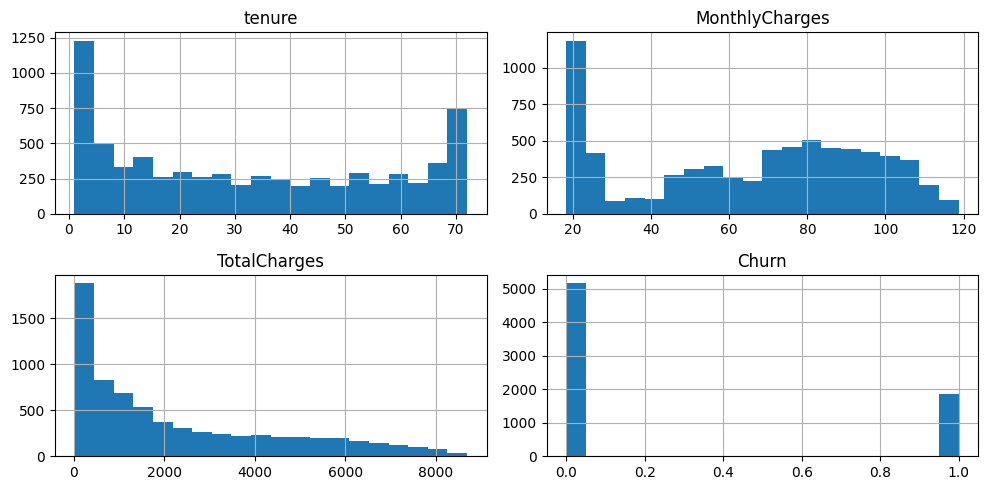

In [157]:
# Exploring numeric columns
numeric_columns = df.select_dtypes('number').columns
df[numeric_columns].hist(bins=20, figsize=(10,5))
plt.tight_layout()
plt.show()


In [158]:
corr_with_churn = df.select_dtypes('number').corr()['Churn'].sort_values(ascending=False)
print(corr_with_churn)


Churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


In [159]:
monthly_charges_by_contract = df.groupby('Contract_One year')['MonthlyCharges'].mean()
print("Average Monthly Charges by One year Contract:", monthly_charges_by_contract)

Average Monthly Charges by One year Contract: Contract_One year
False    64.723759
True     65.079416
Name: MonthlyCharges, dtype: float64


In [160]:
# Split data into testing and training
X = df.drop('Churn', axis = 1)

y = df['Churn']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.3, random_state = 42, stratify = y
)

In [162]:
print("Training set size:", X_train.shape)
print("Test size size:", X_test.shape)

Training set size: (4922, 30)
Test size size: (2110, 30)


In [163]:
#Logistic regression and Random Forest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [166]:
# Random forest
random_forest = RandomForestClassifier(n_estimators=100, random_state = 42)
random_forest.fit(X_train, y_train)

importances = random_forest.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)
print(feature_importance_df.head(10))

                           Feature  Importance
3                     TotalCharges    0.190817
1                           tenure    0.168016
2                   MonthlyCharges    0.167390
10     InternetService_Fiber optic    0.037183
28  PaymentMethod_Electronic check    0.035607
25               Contract_Two year    0.032153
13              OnlineSecurity_Yes    0.029600
4                      gender_Male    0.028769
26            PaperlessBilling_Yes    0.026077
19                 TechSupport_Yes    0.025067


In [168]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None,10, 20],
    'min_samples_split': [2,5]
    
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score: 0.5829026322632461


In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

#Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision", prec)
print("Recall", rec)
print("F1 score:", f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Accuracy: 0.7895734597156399
Precision 0.6409638554216868
Recall 0.4741532976827095
F1 score: 0.5450819672131147
Confusion Matrix: [[1400  149]
 [ 295  266]]


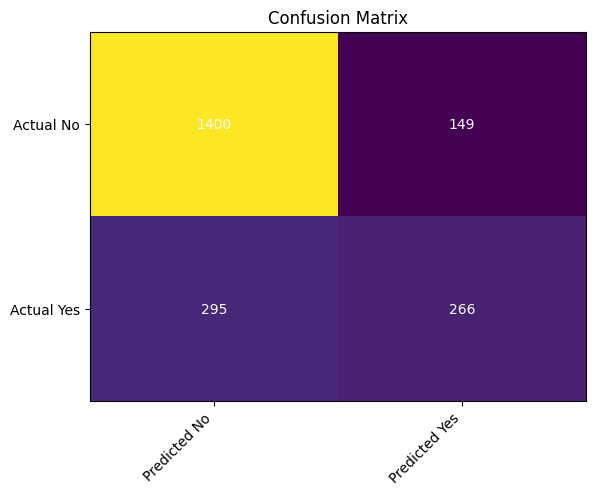

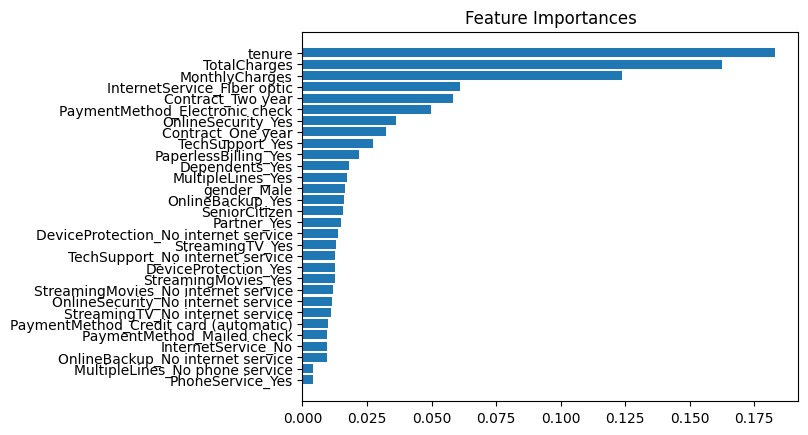

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, aspect='auto')

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Predicted No', 'Predicted Yes'])
ax.set_yticklabels(['Actual No', 'Actual Yes'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion Matrix")
plt.show()

# Step 2: Feature Importance (Bar Plot)
importance_values = best_rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(importance_values)
plt.figure()
plt.barh(range(len(sorted_idx)), importance_values[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title("Feature Importances")
plt.show()
